In [31]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [32]:
#crea nuevo parametros
volumen = 0.8
sesgo = 0.2

#crea datos
inicio = 0
final = 1
step = 0.025
X = torch.arange(inicio, final, step).unsqueeze(dim=1)
print(f"shape de X: {X.shape}")
y = volumen * X + sesgo
print(f"shape de y: {y.shape}")

X[:10], y[:10]

shape de X: torch.Size([40, 1])
shape de y: torch.Size([40, 1])


(tensor([[0.0000],
         [0.0250],
         [0.0500],
         [0.0750],
         [0.1000],
         [0.1250],
         [0.1500],
         [0.1750],
         [0.2000],
         [0.2250]]),
 tensor([[0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]))

In [33]:
#crea la division

train_division = int(0.7 * len(X)) #70% de los datos utilizados para conjunto de entrenamientoß
X_ent, y_ent = X[:train_division], y[:train_division]
X_prueba, y_prueba = X[train_division:], y[train_division:]

In [34]:
len(X_ent), len(X_prueba)

(28, 12)

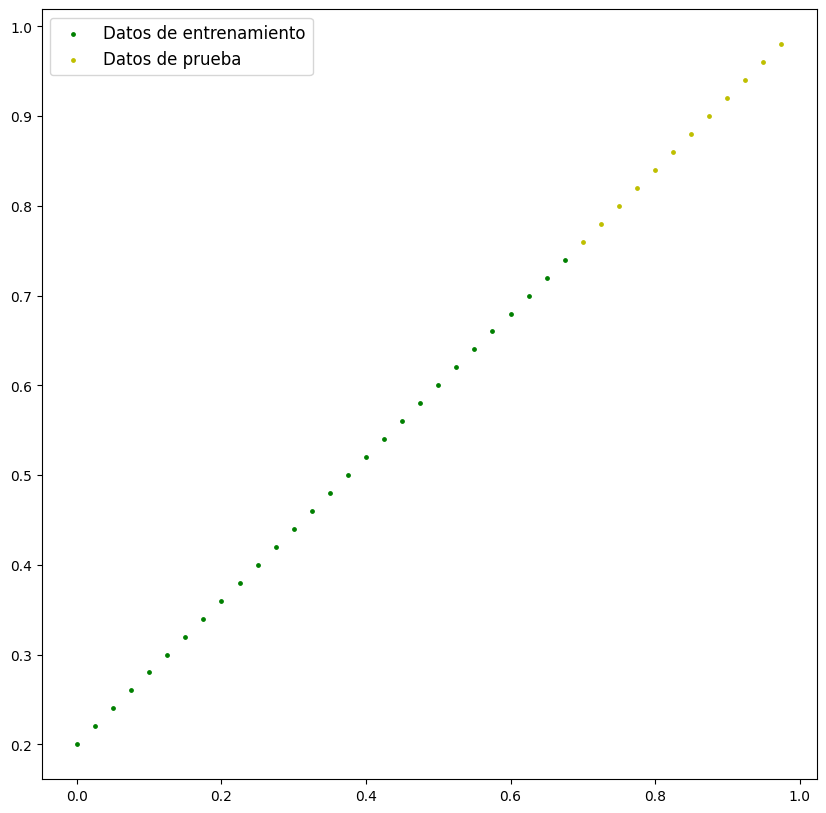

In [35]:
def plot_predictions(datos_ent=X_ent,
                    etiq_ent=y_ent,
                    datos_prueba=X_prueba,
                    etiq_prueba=y_prueba,
                    predictions=None):


# Traza datos de entrenamiento, datos de prueba y comparacompara predicciones

    plt.figure(figsize=(10, 10))

#traza datos de entrenamiento en verde
    plt.scatter(datos_ent, etiq_ent, c='g', s=6, label="Datos de entrenamiento")

# Traza datos de prueba en amarillo
    plt.scatter(datos_prueba, etiq_prueba, c="y", s=6, label="Datos de prueba")

    if predictions is not None:
    #traza las predicciones en rojo
        plt.scatter(datos_prueba, predictions, c="r", s=6, label="Predictions")

# Leyenda
    plt.legend(prop={"size": 12});

plot_predictions();

In [36]:
# Creo una clase de modelo de regresion lineal
class ModeloRegresion(nn.Module):
    def __init__(self):
        super().__init__()
        self.volumen = nn.Parameter(torch.rand(1, dtype=torch.float, requires_grad=True))
        self.sesgo = nn.Parameter(torch.rand(1, dtype=torch.float, requires_grad=True))

    def forward(self, x):
        # Ecuación lineal: y = w * x + b
        return self.volumen * x + self.sesgo

In [37]:
#defino un seed de 42 numeros aleatorios
torch.manual_seed(42)
#creo un objeto instanciando la clase ModeloRegresionLineal
modelo1 = ModeloRegresion()

In [38]:
modelo1

ModeloRegresion()

In [39]:
modelo1.state_dict()

OrderedDict([('volumen', tensor([0.8823])), ('sesgo', tensor([0.9150]))])

In [40]:
modelo1 = ModeloRegresion()
print(modelo1.state_dict())

OrderedDict([('volumen', tensor([0.3829])), ('sesgo', tensor([0.9593]))])


In [41]:
# hago una prediccion con el modelo
with torch.inference_mode():
    y_predc = modelo1(X_prueba)

tensor([[1.2273],
        [1.2369],
        [1.2465],
        [1.2560],
        [1.2656],
        [1.2752],
        [1.2847],
        [1.2943],
        [1.3039],
        [1.3135],
        [1.3230],
        [1.3326]])

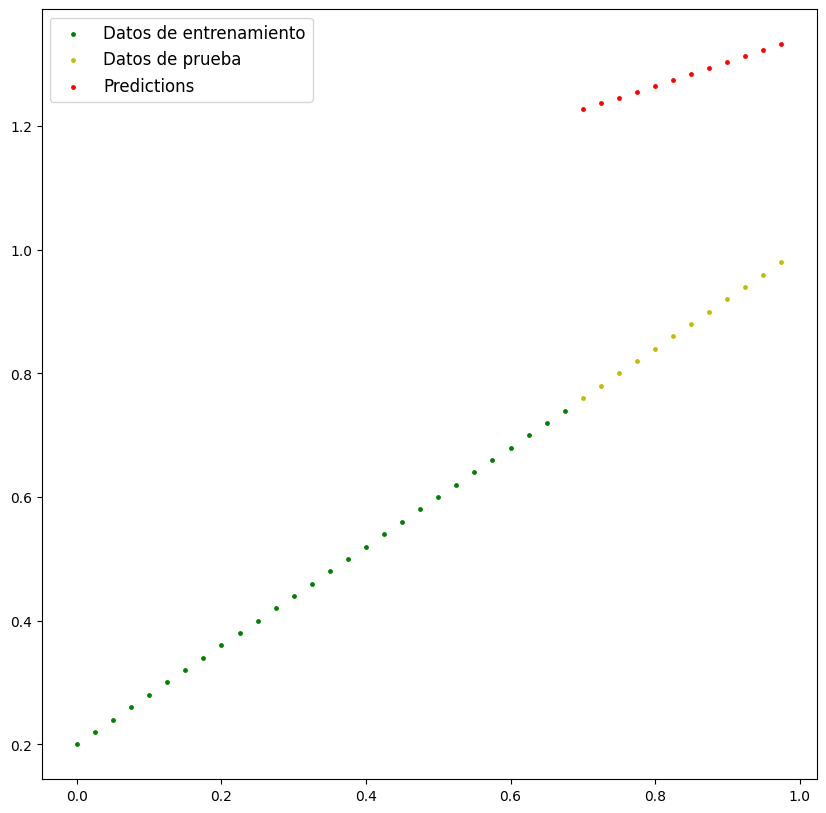

In [44]:
plot_predictions(predictions=y_predc)